In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1 = pd.read_csv(filepath_or_buffer='ex2data1.txt', header = None, names = ['Exam1','Exam2','Accepted'])
data1.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


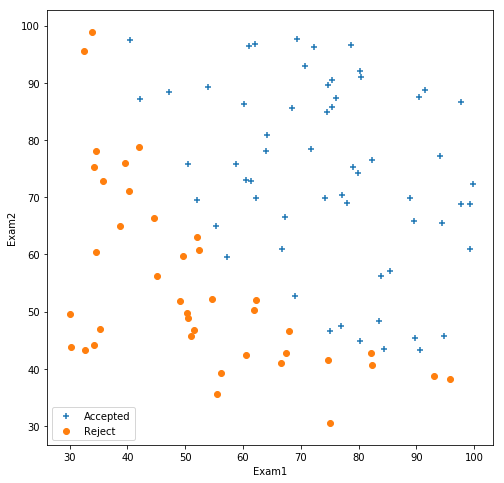

In [9]:
plt.figure(figsize=[8,8])
plt.scatter(x=data1.where(data1.Accepted==1).Exam1.values,y=data1.where(data1.Accepted==1).Exam2.values,marker='+',label='Accepted')
plt.scatter(x=data1.where(data1.Accepted==0).Exam1.values,y=data1.where(data1.Accepted==0).Exam2.values,marker='o',label='Reject')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend(loc=3)
plt.show()

In [232]:
def costFunction(X,y,thetas):
    m = y.size
    h = lambda z: 1/(1+np.exp(-z))
    z = X@thetas
    J = (1/m)*(-(y.T@np.log(h(z)))-((1-y).T@np.log(1-h(z))))
    return J[0]

def gradient_descent(X, y, alpha = 0.01, iterations = 1000):
    m = y.size
    num_j = X.shape[1]
    thetas = np.zeros((num_j,1))
    new_thetas = np.zeros_like(thetas)
    h = lambda z: 1/(1+np.exp(-z))
    J_list = []
    for _ in range(iterations):
        for j in range(num_j):
            grad = (h(X@thetas) - y).T@np.c_[X[:,j]]
            new_thetas[j] = thetas[j] - alpha*grad[0,0]/m
        J_list.append(costFunction(X,y,thetas))
        thetas = new_thetas
        #print(thetas.T)
    return thetas, J_list

In [153]:
X = data1.values.copy()
y = np.c_[X[:,2]]
X = np.c_[np.ones((X.shape[0],1)), X[:,:-1]]

In [250]:
thetas, J_list = gradient_descent(X,y,alpha=.0021, iterations=1000000)

## So this is why the problem recommends an alternate method of optimization
1,000,000 iterations... really? And going any higher with alpha causes the wobbles in the first 10,000 iterations to be even worse.

It took me so long to realize it wasn't actually converging in the first 100 iterations, because it certainly looks like that.

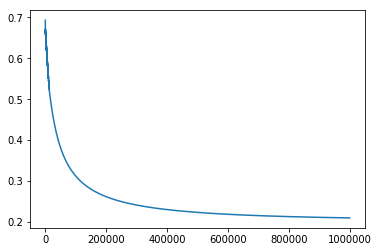

In [251]:
plt.plot(J_list)
plt.show()

In [139]:
x1, x2 = np.meshgrid(np.linspace(0,100),np.linspace(0,100))
grid_points = np.c_[np.ones((len(x1.flatten()),1)),x1.flatten(),x2.flatten()]
values = 1/(1+np.exp(-grid_points@thetas))

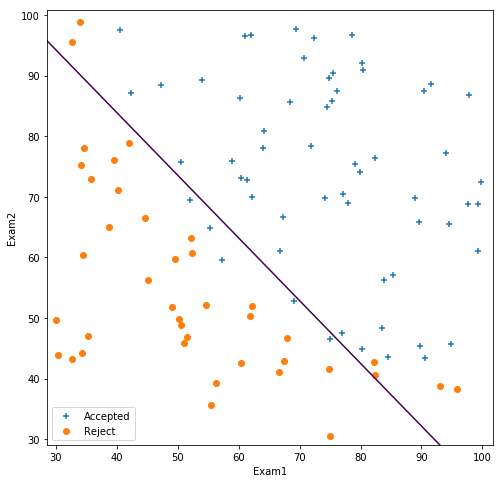

In [264]:
plt.figure(figsize=[8,8])
plt.scatter(x=data1.where(data1.Accepted==1).Exam1.values,y=data1.where(data1.Accepted==1).Exam2.values,marker='+',label='Accepted')
plt.scatter(x=data1.where(data1.Accepted==0).Exam1.values,y=data1.where(data1.Accepted==0).Exam2.values,marker='o',label='Reject')
plt.contour(x1,x2,values.reshape(50,50), levels = [.5])
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.xlim(.95*X[:,1].min(), 1.02*X[:,1].max())
plt.ylim(.95*X[:,2].min(), 1.02*X[:,2].max())
plt.legend(loc=3)
plt.show()